In [1724]:
# Overview of the Project

# Import data into a Pandas DataFrame.
# Merge DataFrames.
# Create a bubble chart that showcases the 
# - average fare versus the total number of rides 
# - with bubble size based on the total number of drivers for each city type, 
# - including urban, suburban, and rural.
# Determine the mean, median, and mode for the following:
# - The total number of rides for each city type.
# - The average fares for each city type.
# - The total number of drivers for each city type.
# Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
# - The number of rides for each city type.
# - The fares for each city type.
# - The number of drivers for each city type.
# Create a pie chart that visualizes each of the following data for each city type:
# - The percent of total fares.
# - The percent of total rides.
# - The percent of total drivers.

In [1725]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [1726]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [1727]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [1728]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [1729]:
# Inspect the City Data DataFrame
# - Get all the rows that contain null values.
# - Make sure the driver_count column has an integer data type.
# - Find out how many data points there are for each type of city.


In [1730]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [1731]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [1732]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [1733]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [1734]:
# Check to see how many data points there are for each type of city. 

In [1735]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [1736]:
# Get the number of data points from the SubUrban cities.
sum(city_data_df["type"]=="Suburban")

36

In [1737]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [1738]:
# Inspect Ride Data DataFrame
# - Get all the rows that contain null values.
# - Make sure the fare and ride_id columns are numerical data types.

In [1739]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [1740]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [1741]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [1742]:
# Merge DataFrames
# Review each DataFrame.
# The columns in the city_data_df DataFrame are:
# - city
# - driver_count
# - type
# The columns in the ride_data_df are:
# - city
# - date
# - fare
# - ride_id

In [1743]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [1744]:
# Bubble chart, plot the following:
# - The average fare for each type of city on the y-axis, use Pandas mean() method for each city in the “fare” column.
# - The total number of rides for each type city on the x-axis, use Pandas count() method for each city in the “ride_id” column.
# - Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city, get the average driver_count for each city.

# Create separate DataFrames for each type and then create Data Series for each step.

# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [1745]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [1746]:
# Number of rides for each city by each type of city
# - create a Series where the index is the name of the city and 
# - the column is the number of rides for that city.

# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [1747]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [1748]:
# Average fare type for each city type
# Calculate the average fare for each city in the urban, suburban, and rural cities
# - Use the separate DataFrames for each city type

# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [1749]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [1750]:
rural_avg_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [1751]:
# Average Number of Drivers for Each City Type
# Use groupby() function and get the mean() of the driver_count column

# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [1752]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

In [1753]:
rural_driver_count

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

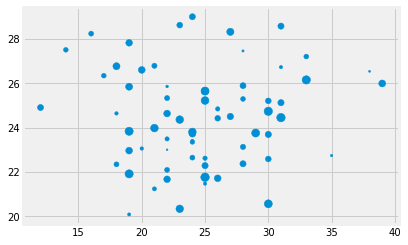

In [1754]:
# Create a scatter plot for each type of city where the following conditions are met:
# - x-axis is the number of rides for each city.
# - y-axis is the average fare for each city.
# - size of each marker is the average number of drivers in each city.

# Create the Urban Cities Bubble Chart
# Build the scatter plots for urban cities.
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=urban_driver_count)

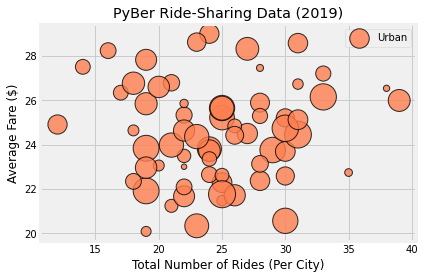

In [1755]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

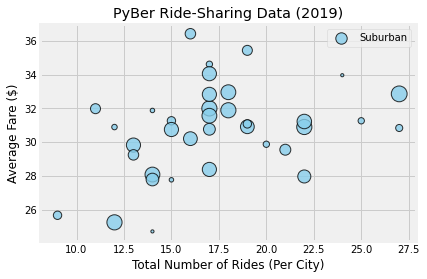

In [1756]:
# Create the Suburban Cities Bubble Chart
# Repurpose the chart for suburban.
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

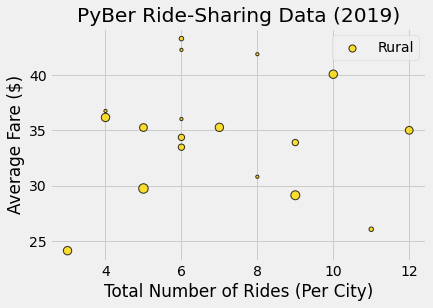

In [1834]:
# Create the Rural Cities Bubble Chart

# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

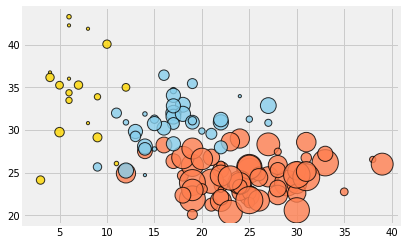

In [1758]:
# Create a Bubble Chart for All Cities

# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count, 
      urban_avg_fare, 
      s=10*urban_driver_count, c="coral", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
      suburban_avg_fare, 
      s=10*suburban_driver_count, c="skyblue", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
      rural_avg_fare, 
      s=10*rural_driver_count, c="gold", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Rural")

# Show the plot
plt.show()

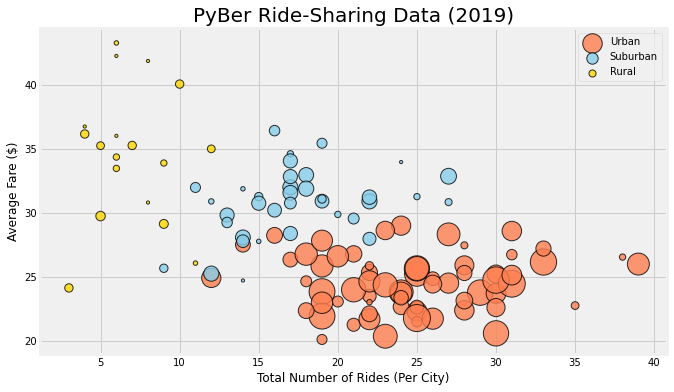

In [1759]:
# Decorate
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
      urban_avg_fare, 
      s=10*urban_driver_count, c="coral", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
      suburban_avg_fare, 
      s=10*suburban_driver_count, c="skyblue", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
      rural_avg_fare, 
      s=10*rural_driver_count, c="gold", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Show the plot
plt.show()

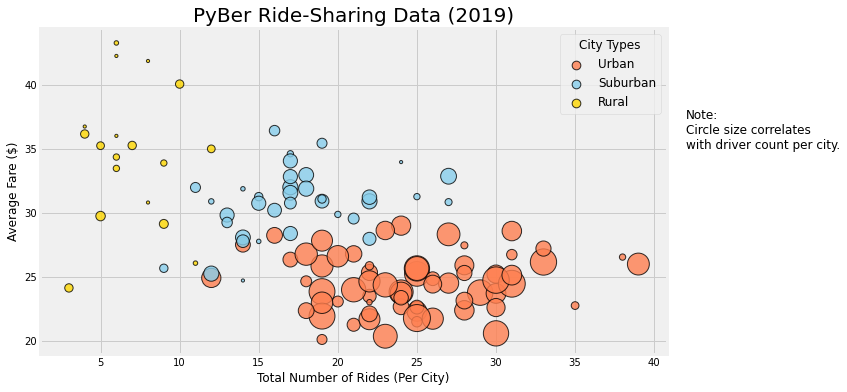

In [1760]:
# The markers in the legend have different sizes, 
# - automatically determined based on the average size of the marker.
# Customize the legend to scale them to the same size.

plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
      urban_avg_fare, 
      s=10*urban_driver_count, c="coral", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
      suburban_avg_fare, 
      s=10*suburban_driver_count, c="skyblue", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
      rural_avg_fare, 
      s=10*rural_driver_count, c="gold", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", 
                  mode="Expanded",
                  scatterpoints=1, 
                  loc="best", 
                  title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Save the figure (as a .PNG)
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

In [1761]:
# Summary Statistics for Number of Rides by City Type

# Compare the following three ways to calculate the summary statistics:
# - Pandas describe() function on the DataFrame or Series.
# - Pandas mean(), median(), and mode() methods on a Series.
# - NumPy mean() and median() functions, and the SciPy stats mode() function on a Series.

# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [1762]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [1763]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [1764]:
# Get summary statistics of the ride count for each city type.
urban_ride_count.describe()
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [1765]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [1766]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [1767]:
# Pandas mean(), median(), and mode() Methods
# Get only the mean without getting the complete summary statistics, use the mean() method.

# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [1768]:
# Calculate the MEDIAN of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [1769]:
# NumPy mean() and median() Functions and SciPy mode() Function
# Optional aproach to calculating the mean, median, and mode of a DataFrame or Series 
# - use the NumPy and SciPy statistics modules. 
# - There might come a time when you’re working in the Python interpreter or VS Code environment instead of the Jupyter Notebook environment.

# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [1770]:
# Calculate the mean, median, and mode for the ride counts
# — otherwise known as the measures of central tendency 

# Calculate the measures of central tendency for the ride count for the URBAN cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [1771]:
# Calculate the measures of central tendency for the ride count for the SUBURBAN cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [1772]:
# Calculate the measures of central tendency for the ride count for the RURAL cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [1773]:
# Summary Statistics for the Fare by City Type
# Create a Series with fares from the "fare" column for the urban_cities_df DataFrame:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [1774]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [1775]:
# Get the fares for the SUBURBAN cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [1776]:
# Calculate the measures of central tendency for the average fare for the SUBURBAN cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [1777]:
# Get the fares for the RURAL cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [1778]:
# Calculate the measures of central tendency for the average fare for the RURAL cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [1779]:
# Summary Statistics for the Number of Drivers by City Type

# Create a Series for each city type based on the driver_count column in each city type DataFrame.

# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [1780]:
# Calculate the measures of central tendency for the Driver Count for the URBAN cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean Driver Count for urban cities is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median Driver Count for urban cities is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode Driver Count for urban cities is {mode_urban_drivers}.")

The mean Driver Count for urban cities is 36.68.
The median Driver Count for urban cities is 37.00.
The mode Driver Count for urban cities is ModeResult(mode=array([39]), count=array([86])).


In [1781]:
# Get the driver count data from the SUBURBAN cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [1782]:
# Calculate the measures of central tendency for the Driver Count for the SUBURBAN cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean Driver Count for suburban cities is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median Driver Count for suburban cities is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode Driver Count for suburban cities is {mode_suburban_drivers}.")

The mean Driver Count for suburban cities is 13.71.
The median Driver Count for suburban cities is 16.00.
The mode Driver Count for suburban cities is ModeResult(mode=array([20]), count=array([79])).


In [1783]:
# Get the driver count data from the RURAL cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [1784]:
# Calculate the measures of central tendency for the Driver Count for the RURAL cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean Driver Count for rural cities is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median Driver Count for rural cities is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode Driver Count for rural cities is {mode_rural_drivers}.")

The mean Driver Count for rural cities is 4.30.
The median Driver Count for rural cities is 4.00.
The mode Driver Count for rural cities is ModeResult(mode=array([1]), count=array([32])).


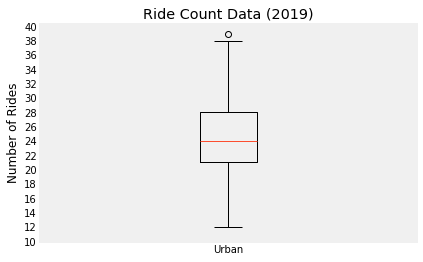

In [1785]:
# Create Box-and-Whisker Plots

# Box-and-Whisker Plots for Ride Count Data requires we use ax.boxplot() function, 
# - takes an array inside the parentheses.


# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [1786]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [1787]:
suburban_ride_count.sort_values()

city
East Aaronbury         9
Sotoville             11
Lake Ann              12
Lewishaven            12
East Kentstad         13
North Jeffrey         13
Williamsonville       14
Victoriaport          14
North Richardhaven    14
Lake Omar             14
Rodriguezview         15
North Timothy         15
Grayville             15
Myersshire            16
Barronchester         16
Davidfurt             17
Veronicaberg          17
East Danielview       17
New Shannonberg       17
Mezachester           17
Lewisland             17
New Olivia            17
Lake Scott            18
Bethanyland           18
Nicolechester         19
Port Shane            19
Brandonfort           19
West Kimmouth         20
West Hannah           21
New Raymond           22
Colemanland           22
South Teresa          22
South Brenda          24
Lake Robertside       25
Josephside            27
East Marymouth        27
Name: ride_id, dtype: int64

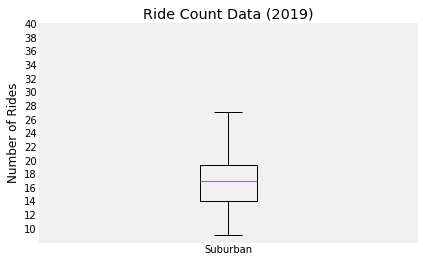

In [1788]:
# Create a box-and-whisker plot for the SUBURBAN cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

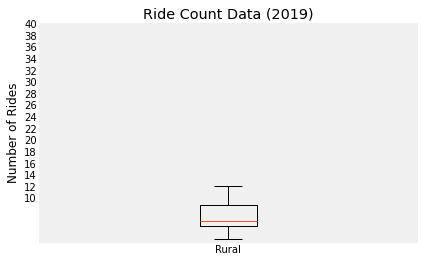

In [1789]:
# Create a box-and-whisker plot for the RURAL cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

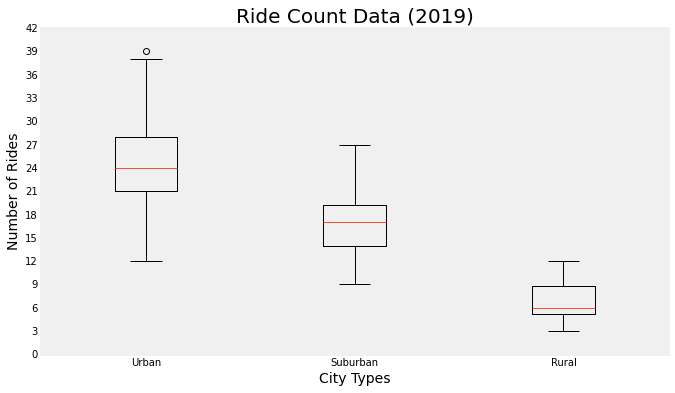

In [1790]:
# Show all the city type box-and-whisker plots on one chart
# - increase the size of the chart and the font of the title and axes labels.

# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [1791]:
# Outliers

# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


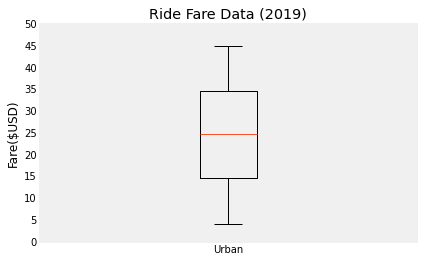

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [1792]:
# Box-and-Whisker Plots for Ride Fare Data
# - with summary statistics.

# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

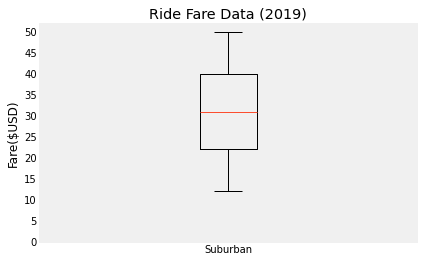

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [1793]:
# Create a box-and-whisker plot for the SUBURBAN fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

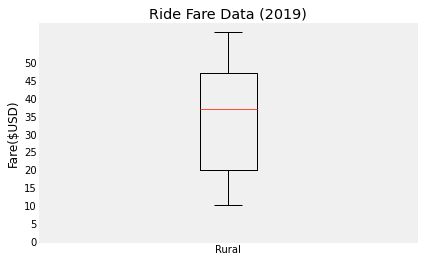

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [1794]:
# Create a box-and-whisker plot for the RURAL fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

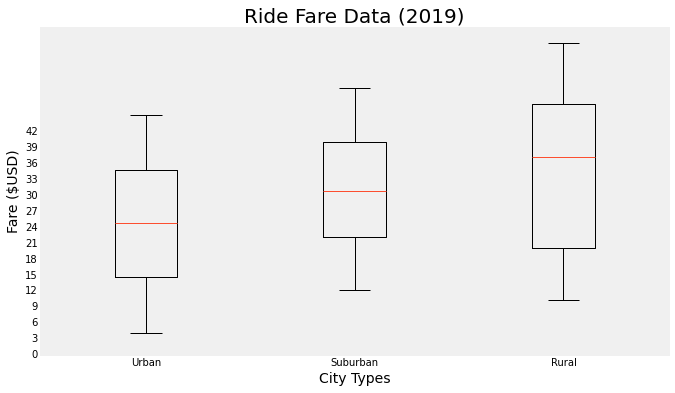

In [1795]:
# SKILL DRILL
# Create a box-and-whisker plot that has all three city types’ fare data 
# - in one plot
# - Save the combined box-and-whisker plot as Fig3.png to your “analysis” folder.

# Add all FARE box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

In [1796]:
# Finding
# - No outliers
# - Rural fare about $5 & $11 more per ride than the suburban & urban respectively.
# By looking at the number of riders, can u get a sense of the overall revenue?

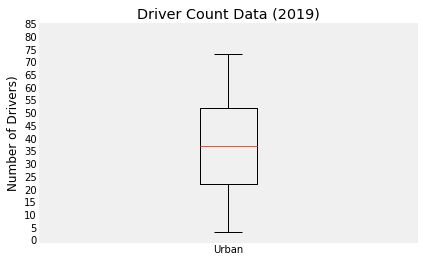

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [1797]:
# Box-and-Whisker Plots for Driver Count Data

# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

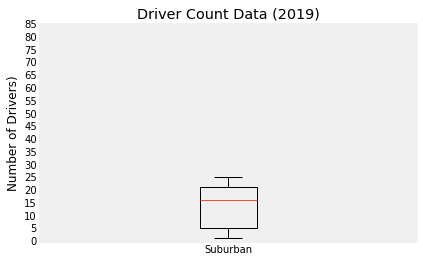

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [1798]:
# SKILL DRILL


# Create the box-and-whisker plot for the SUBURBAN driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

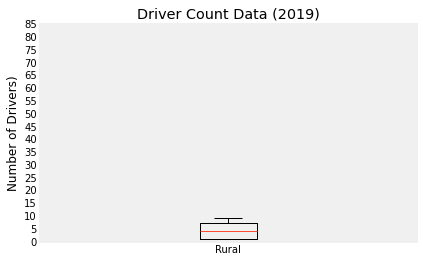

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [1799]:
# Create the box-and-whisker plot for the RURAL driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

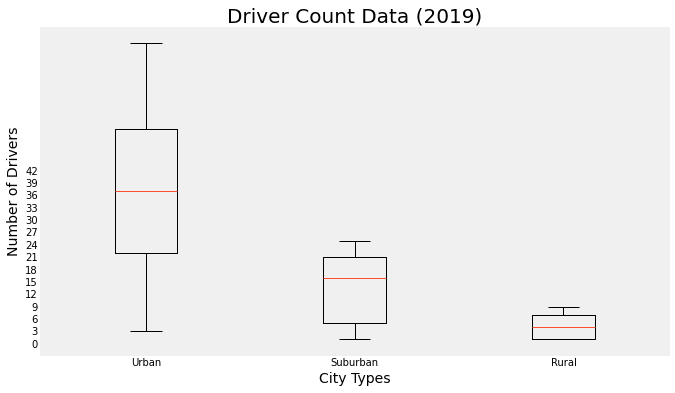

In [1800]:
# SKILL DRILL
# Create a box-and-whisker plot with three city types’ driver count data in one box-and-whisker plot that
# - Save combined plot as Fig4.png in your “analysis” folder.

# Add all DRIVER count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [1801]:
# FINDING
# The average number of drivers in rural cities is nine to four times less per city than in urban and suburban cities, respectively. 
# By looking at driver count data and fare data, can you get a sense of the overall revenue?

In [1802]:
# Get the Percentage of Fares for Each City Type as a Pie chart
# - Get the total fares for each city type.
# - Get the total for all the fares for all the city types.
# - Calculate the percentage of the total fares for each city type.

# Create a Series to get the total fares for city type, 
# - index is the type of city on the pyber_data_df DataFrame
# - column is the sum of the fares for city type.

# Calculate the percentage of the total fares for each city type based on the total fares, 
# - Use groupby() function on the pyber_data_df DataFrame and group by the type of city column so the type of city is the index.
# - Apply the sum() method on the fare column to get the Series with the total number of fares for each city type.
# - Divide the total fares for each city type by the total of all the fares and multiply by 100.

# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [1803]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [1804]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [1805]:
# Concise approach
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

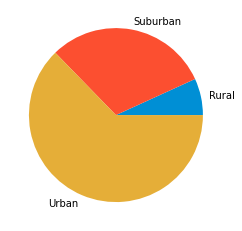

In [1806]:
# Pie Chart for the Percentage of Fares by City Type
# Create pie chart by using the MATLAB approach, using the plt.pie() function.

# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

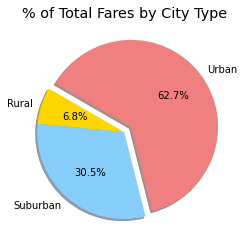

In [1807]:
# Add ttle, percentages, change to company colour scheme, add shadow effec & adjust start angle

# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

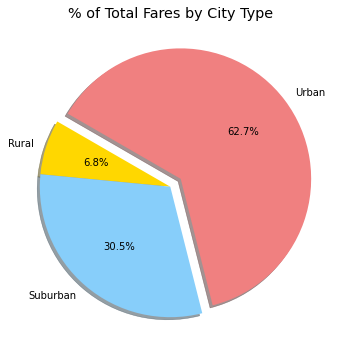

In [1808]:
# Change the font size to 14. To do this, we will need to edit the code block.
# - There is no parameter for fontsize in pie charts like there is for scatter plots. 
# - However, Matpltolib has a way to change the default parameters for charts by using the rcParams, which accesses the run and configure settings for the Matplotlib parameters.
# - To change the default parameters we need to import the matplotlib library, 
# - which is not the same as the matplotlib.pyplot we imported for graphing with the plt() function. Let’s edit our code block above and add import matplotlib as mpl on the first line. After the plt.title(), we will change the font size by adding mpl.rcParams['font.size'] = 14.

# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [1809]:
# Second pie chart 
# - percentage of total rides for each type of city, 
# - each pie wedge represents the percentage of total rides for each city type

# - Get the total number of rides for each city type.
# - Get the total rides for all the city types.
# - Calculate the percentage of the total rides for each city type.

# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

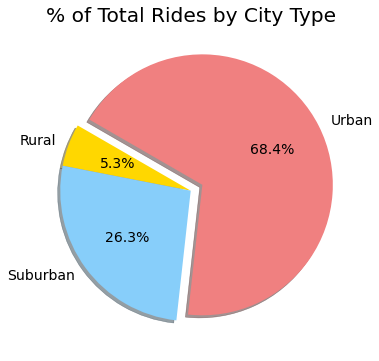

In [1810]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [1811]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

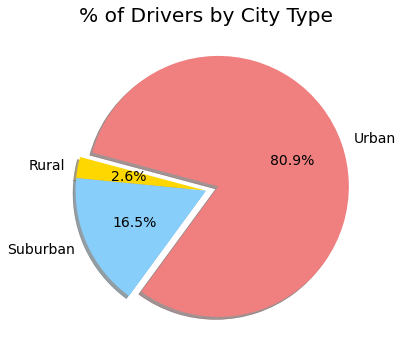

In [1812]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()

In [1813]:
# Challenge Overview

# Three parts: 
# - two additional technical analyses and 
# - a written report that delivers your results to the CEO.
# - Technical Analysis Deliverable 1: A DataFrame that summarizes the key metrics for the ride-sharing data by city type.
# - Technical Analysis Deliverable 2: A multiple-line chart, with one line for each city type, that shows the sum of the fares for each week.
# - Delivering Results: A written report of your results, saved in a README.md document on your GitHub repository.

# Technical Analysis Deliverable 1: A Summary DataFrame
# Building on Module 4 skills create summary DataFrame that showcases the following for each city type:
# - Total Rides
# - Total Drivers
# - Total Fares
# - Average Fare per Ride
# - Average Fare per Driver

# pyber_data_df

In [1814]:
# Total Rides Count
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
# ride_count

In [1815]:
#city_data_df.sum()['driver_count']

In [1816]:
# Total Driver Count
driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
#driver_count

In [1817]:
# Total Fares
fare_totals = pyber_data_df.groupby(["type"]).sum()["fare"]
# fare_totals

In [1818]:
# Ave Fare per Ride
ave_fare_per_ride = fare_totals / ride_count
#ave_fare_per_ride

In [1819]:
# Ave Fare per Driver
ave_fare_per_driver = fare_totals / driver_count
#ave_fare_per_driver

In [1820]:
# Adding a list of values with keys to create the new SUMMARY DataFrame.
summary_df = pd.DataFrame({
    "Total Rides": ride_count,
          "Total Drivers": driver_count,
          "Total Fares": fare_totals,
          "Average Fare per Ride": ave_fare_per_ride,
          "Average Fare per Driver": ave_fare_per_driver
           })
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [1821]:
# Delete the index name
summary_df.index.name = None
#summary_df.dtypes


In [1822]:
# Apply Formatting
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,.0f}".format)

summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,.0f}".format)

summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)

summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)

summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [1823]:
# Technical Analysis Deliverable 2: 
# - Multiple-Line Plot for the Sum of the Fares for Each City Type

# 1. Rename the columns as per challenge spec.
pyber_data_df.columns = ['City', 'Date','Fare','Ride Id','No. Drivers', 'City Type']
pyber_data_df.columns

Index(['City', 'Date', 'Fare', 'Ride Id', 'No. Drivers', 'City Type'], dtype='object')

In [1824]:
# 2. Set the index to the Date Column
pyber_data_df = pyber_data_df.set_index('Date')

In [1825]:
pyber_data_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [1826]:
# 3. Create a new dataframe using copy() method and includ only City Type and Fare

new_df = pyber_data_df[['City Type','Fare']].copy()
new_df.index

Index(['2019-01-14 10:14:22', '2019-03-04 18:24:09', '2019-02-24 04:29:00',
       '2019-02-10 23:22:03', '2019-03-06 04:28:35', '2019-03-11 12:26:48',
       '2019-02-27 11:17:56', '2019-04-26 00:43:24', '2019-01-08 03:28:48',
       '2019-03-09 06:26:29',
       ...
       '2019-04-19 04:32:47', '2019-03-18 10:38:05', '2019-01-27 18:43:05',
       '2019-04-29 01:58:44', '2019-01-30 10:55:23', '2019-04-29 17:04:39',
       '2019-01-30 00:05:47', '2019-02-10 21:03:50', '2019-05-07 19:22:15',
       '2019-04-25 10:20:13'],
      dtype='object', name='Date', length=2375)

In [1827]:
# 4. Set the index to the datetime data type.
# - Check to make sure the index is a datetime data type by using the info() method on the DataFrame.new_df.info()
new_df.index = pd.to_datetime(new_df.index)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [1828]:
# 5. Calculate the sum() of fares by the type of city and date using groupby() to create a Series.
# 6. Convert the groupby Series into a DataFrame.
sum_of_fares_df = pd.DataFrame( new_df.groupby(['Date','City Type']).sum()['Fare'] )

In [1836]:
sum_of_fares_df

,,Fare
Date,City Type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [1840]:
# 7. Reset the index, 
sum_of_fares_df.reset_index()

,Date,City Type,Fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [1841]:
# - then create a pivot table DataFrame with the Date as the index and columns = 'City Type'. 
# - The Fare for each Date should appear in each row.

fares_pivot = pd.DataFrame( 
    sum_of_fares_df.pivot_table( 
        index = ['Date'],
        values = ['Fare'],
        columns = ['City Type']
    )
)
fares_pivot

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [1843]:
# 8. Create a new DataFrame from the pivot table DataFrame on the given dates, '2019-01-01':'2019-04-28', using loc.

fares_in_dates = fares_pivot.loc['2019-01-01':'2019-04-28']
fares_in_dates

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [1832]:
# 9. Create a new DataFrame by setting the DataFrame you created in Step 8 with resample() in weekly bins, 
# - and calculate the sum() of the fares for each week in the resampled data.

weekly_fares = pd.DataFrame( fares_in_dates.resample('W').sum() )
weekly_fares.columns
#weekly_fares['Fare','Rural']

MultiIndex([('Fare',    'Rural'),
            ('Fare', 'Suburban'),
            ('Fare',    'Urban')],
           names=[None, 'City Type'])

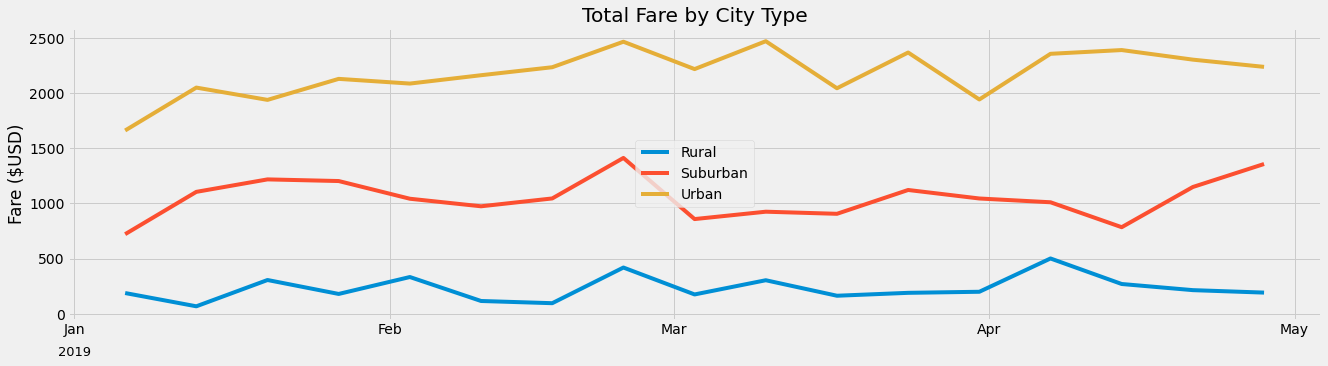

In [1872]:
# 10. Using the object-oriented interface method, plot the DataFrame you created in Step 9 using the df.plot() function.
# - Import the style from Matplotlib.
# - Use the FiveThirtyEight (Links to an external site.) graph style.
# - Add a title.
# - Add x- and y-axis labels according to the final figure.
# - Save the figure to the “analysis” folder.
# - Make the figure size large enough so it’s not too small.

# MATLAB STYLE
#weekly_fares.plot(kind='line', figsize=(12,3), title='Total Fare by City Type')

# Object Oriented style
fig, ax = plt.subplots(figsize=(20,5))
plt.style.use('fivethirtyeight')
# Add the title, y-axis label
ax.set_title('Total Fare by City Type')
ax.set_ylabel('Fare ($USD)')
# Set the x-axis date format to MONTH, create & position xaxis label
ax.xaxis.set_label_coords(0.005, -0.09)
ax.set_xlabel('2019', fontsize=13)
# Set the x-axis date format & tick interval
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)

# Plot the three City Type lines
plt.plot(weekly_fares)

# Define the legend and position.
ax.legend(['Rural','Suburban','Urban'],
         loc='center')

# Plot the month on the x-axis
from matplotlib.dates import MonthLocator, DateFormatter
ax.xaxis.set_major_locator(MonthLocator())

# Save the final figure (as a .PNG)
plt.savefig("analysis/Fig8.png")

# Show the final plot
plt.show()



